In [1]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
#turning the player data csv into pandas dataframe

df = pd.read_csv("player_stats.csv")
players=df['Player']
df1 = pd.read_csv("shootingstats.csv")
df1.reset_index(inplace=True)
df2 = pd.read_csv("advancedplayerstats.csv")
df2.reset_index(inplace=True)

df3 = pd.read_csv("playerpbpstats.csv")
df3.reset_index(inplace=True)


# df4 = df4.drop(labels = 'Rk',axis = 1)
df5 = pd.read_csv("adjustedshooting.csv")
df5.reset_index(inplace=True)

# df1.set_index(players,inplace=True)
# df.set_index(players,inplace=True,drop=True)

# df = df.join(df1,lsuffix='l',rsuffix='r')
# df.set_index(players,inplace=True,drop=True)
# df.drop('Player',axis=1)
# df = pd.merge(df,df2,on='Player')

# df.set_index(players,inplace=True,drop=True)
# df.drop('Player',axis=1)
# df = pd.merge(df,df3)
# df.set_index(players,inplace=True,drop=True)
# df.drop('Player',axis=1)

# df = pd.merge(df,df5)
# df.set_index(players,inplace=True,drop=True)
# df.drop('Player',axis=1)

# df = pd.merge(df,df4)
# df.set_index(players,inplace=True,drop=True)
# df.drop('Player',axis=1)
# df
# print(df.columns)
df = pd.concat([df,df1,df2,df3,df5],axis=1,join='inner')


# df = df[list(set(df.columns))]
# df.drop('Player',axis=1)

# df = pd.concat([df,df3],axis=1,join='inner')
# df = df[df.columns.unique()]

# df = pd.concat([df,df4],axis=1,join='inner')
# df = df[list(set(df.columns))]

# df = pd.concat([df,df5],axis=1,join='inner')
# df = df[list(set(df.columns))]


# df = df.dropna(axis=1)
# print(df.columns)
df.loc[:,~df.T.duplicated(keep='first')]
# cols=pd.Series(df.columns)
# for dup in df.columns[df.columns.duplicated(keep=False)]: 
#     cols[df.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
#                                      if d_idx != 0 
#                                      else dup 
#                                      for d_idx in range(df.columns.get_loc(dup).sum())]
#                                     )
# df.columns=cols

df.fillna(0,inplace=True)
df.drop('Rk',inplace=True,axis=1)
df.drop('Age',inplace=True,axis=1)
df.drop('Tm',inplace=True,axis=1)
df.drop('index',inplace=True,axis=1)
df

,Player,Pos,G,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,ORtg,DRtg,Dist.,2P,0-3,3-10,10-16,16-3P,3P,2P.1,0-3.1,3-10.1,10-16.1,16-3P.1,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%,Att.,#.1,Dist.,2P,0-3,3-10,10-16,16-3P,3P,2P.1,0-3.1,3-10.1,10-16.1,16-3P.1,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%,Att.,#.1,OnCourt,On-Off,BadPass,LostBall,Shoot,Off.,Shoot.1,Off..1,PGA,And1,Blkd,FG,2P,3P,eFG,FT,TS,FTr,3PAr,FG+,2P+,3P+,eFG+,FT+,TS+,FTr+,3PAr+,FG Add,TS Add
0,Steven Adams\adamsst01,C,63,63,8.2,13.8,0.592,0.0,0.1,0.333,8.2,13.7,0.594,3.4,5.8,0.582,6.0,10.9,16.9,4.2,1.5,1.9,2.7,19.8,122.0,106,4.4,0.994,0.513,0.397,0.082,0.002,0.006,0.594,0.743,0.416,0.513,1.000,0.333,0.670,1.000,0.176,78,0.333,0.000,1,1,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.592,0.594,0.333,0.593,0.582,0.604,0.420,0.006,129.0,113.0,93.0,112.0,75.0,107.0,162.0,2.0,61.4,44.2
1,Bam Adebayo\adebaba01,PF,72,72,8.9,16.0,0.557,0.0,0.3,0.143,8.8,15.7,0.564,5.3,7.7,0.691,3.6,11.3,14.8,7.4,1.7,1.9,4.1,23.1,116.0,106,5.8,0.982,0.481,0.301,0.144,0.056,0.018,0.564,0.726,0.445,0.404,0.227,0.143,0.715,0.500,0.219,157,0.571,0.125,1,0,4.4,0.994,0.513,0.397,0.082,0.002,0.006,0.594,0.743,0.416,0.513,1.000,0.333,0.670,1.000,0.176,78.0,0.333,0.000,1.0,1.0,4.5,5.3,33.0,27.0,62.0,20.0,87.0,5.0,336.0,17.0,32.0,0.557,0.564,0.143,0.558,0.691,0.598,0.483,0.018,121.0,108.0,40.0,106.0,89.0,106.0,186.0,5.0,46.5,63.9
2,LaMarcus Aldridge\aldrila01,C,53,53,10.7,21.6,0.493,1.7,4.3,0.389,9.0,17.3,0.519,4.3,5.2,0.827,2.8,7.9,10.7,3.5,1.0,2.4,2.0,27.3,115.0,112,13.7,0.802,0.202,0.129,0.227,0.245,0.198,0.519,0.719,0.471,0.461,0.433,0.389,0.567,0.951,0.044,31,0.185,0.379,1,0,5.8,0.982,0.481,0.301,0.144,0.056,0.018,0.564,0.726,0.445,0.404,0.227,0.143,0.715,0.500,0.219,157.0,0.571,0.125,1.0,0.0,4.9,6.1,94.0,53.0,99.0,32.0,174.0,7.0,928.0,42.0,60.0,0.493,0.519,0.389,0.532,0.827,0.571,0.241,0.198,107.0,99.0,109.0,101.0,107.0,101.0,93.0,52.0,4.3,10.4
3,Kyle Alexander\alexaky01,C,2,0,3.8,7.5,0.500,0.0,0.0,0.000,3.8,7.5,0.500,0.0,0.0,0.000,7.5,3.8,11.3,0.0,0.0,0.0,3.8,7.5,96.0,116,1.5,1.000,1.000,0.000,0.000,0.000,0.000,0.500,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0,0,13.7,0.802,0.202,0.129,0.227,0.245,0.198,0.519,0.719,0.471,0.461,0.433,0.389,0.567,0.951,0.044,31.0,0.185,0.379,1.0,0.0,-3.8,-5.3,13.0,20.0,70.0,29.0,83.0,1.0,309.0,23.0,20.0,0.500,0.500,0.000,0.500,0.000,0.500,0.000,0.000,109.0,95.0,0.0,95.0,0.0,89.0,0.0,0.0,-0.1,-0.3
4,Nickeil Alexander-Walker\alexani01,SG,47,1,7.7,20.8,0.368,3.6,10.4,0.346,4.1,10.4,0.391,2.0,2.9,0.676,0.7,5.9,6.6,7.0,1.3,0.6,4.2,20.9,93.0,113,15.9,0.500,0.244,0.173,0.053,0.030,0.500,0.391,0.523,0.261,0.214,0.375,0.346,0.192,0.913,0.008,2,0.188,0.360,4,0,1.5,1.000,1.000,0.000,0.000,0.000,0.000,0.500,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,-12.9,-15.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.368,0.391,0.346,0.455,0.676,0.473,0.139,0.500,80.0,75.0,97.0,86.0,87.0,84.0,53.0,130.0,-39.3,-51.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Trae Young\youngtr01,PG,60,60,12.0,27.5,0.437,4.5,12.5,0.361,7.5,15.0,0.501,10.6,12.3,0.860,0.7,4.9,5.6,12.3,1.4,0.2,6.4,39.1,114.0,117,16.8,0.545,0.183,0.167,0.146,0.050,0.455,0.501,0.596,0.452,0.467,0.413,0.361,0.161,0.298,0.000,0,0.033,0.579,1,1,11.9,0.631,0.329,0.250,0.023,0.028,0.369,0.501,0.601,0.413,0.214,0.353,0.356,0.568,0.937,0.048,26.0,0.423,0.362,2.0,0.0,-6.2,-5.8,50.0,22.0,69.0,18.0,28.0,26.0,279.0,6.0,44.0,0.457,0.540,0.344,0.530,0.751,0.566,0.288,0.426,99.0,103.0,96.0,100.0,97.0,100.0,111.0,111.0,1.2,2.0
647,C

In [2]:
# playernames = df['Player']
# df = df[df['GS'] > 25]


# df

In [3]:
positions = []
for i in df['Pos']:
    pos = 1 if i[:2] == 'PG' else 2 if i[:2] == 'SG' else 3 if  i[:2]== 'SF' else 4 if  i[:2]== 'PF' else 5
    print(pos)
    positions.append(pos)
df2 = df
df.drop('Player',axis=1,inplace=True)
print(positions)
df['Pos'] = positions

5
4
5
5
2
2
5
1
4
2
3
5
4
4
3
4
3
1
3
3
3
1
5
2
5
1
5
1
4
2
3
4
4
3
3
5
3
3
3
4
2
2
2
2
2
5
5
5
2
4
5
4
4
1
5
5
5
4
1
2
3
4
5
5
5
5
1
3
2
5
3
1
2
5
4
3
4
3
3
3
3
1
2
1
2
2
5
3
3
1
5
2
1
1
1
3
3
2
3
3
5
5
5
5
2
4
5
3
3
5
1
4
5
2
1
5
5
5
5
4
1
4
1
1
1
4
3
4
3
4
2
2
2
5
2
2
2
4
4
1
2
1
4
4
3
4
4
5
2
2
3
3
2
3
3
4
2
2
1
2
2
2
4
5
2
5
5
5
1
3
5
3
5
5
5
1
2
1
3
2
4
2
1
5
5
5
4
1
2
5
2
5
3
3
2
5
2
2
2
2
2
2
5
5
5
3
5
1
4
2
3
1
2
2
1
1
4
4
4
5
4
2
2
5
4
3
5
5
2
5
1
4
3
1
3
3
3
4
2
1
2
4
4
2
4
4
5
4
2
2
4
1
5
4
5
2
2
2
4
4
3
1
5
2
3
4
2
3
5
5
5
3
5
5
5
5
4
4
4
5
2
4
4
2
1
4
4
4
4
1
2
3
4
5
3
5
2
3
5
4
2
3
3
5
3
4
4
4
1
4
3
1
5
3
4
2
1
2
3
1
4
2
2
4
3
4
4
4
5
3
4
1
1
2
5
5
3
1
5
1
5
5
5
2
2
4
4
4
3
4
2
2
1
3
2
2
5
3
4
4
5
2
2
2
4
3
4
2
2
2
5
5
5
3
5
2
1
4
5
5
5
4
1
3
4
1
2
1
5
5
3
5
4
3
3
1
3
1
2
2
4
3
2
1
3
4
5
2
3
1
3
2
2
2
2
5
1
5
3
5
3
3
1
4
2
2
2
3
2
2
2
1
4
3
3
4
4
4
4
1
4
1
3
1
1
3
5
3
3
4
1
1
1
1
2
4
5
5
2
2
2
2
1
1
5
3
3
5
4
5
1
2
4
2
5
3
3
3
4
1
4
4
4
4
4
5
4
5
1
2
1
3
5
2
5
5
5
1
2
3


In [4]:
df = df.dropna()
# playernames = df['Player']
# df = df[["Pos", 'FG', 'FGA','3P','3PA','FT%', 'ORB', 'DRB', 'TRB','AST','STL','BLK','TOV','PF','PTS']]
# df2= df[["Pos", 'FG', 'FGA','3P','3PA','FT%', 'ORB', 'DRB', 'TRB','AST','STL','BLK','TOV','PF','PTS']]
# # kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
# df["Pos"].unique()
df.columns

Index(['Pos', 'G', 'GS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PTS', 'ORtg', 'DRtg', 'Dist.', '2P', '0-3', '3-10', '10-16',
       '16-3P', '3P', '2P.1', '0-3.1', '3-10.1', '10-16.1', '16-3P.1', '3P.1',
       '2P.2', '3P.2', '%FGA', '#', '%3PA', '3P%', 'Att.', '#.1', 'Dist.',
       '2P', '0-3', '3-10', '10-16', '16-3P', '3P', '2P.1', '0-3.1', '3-10.1',
       '10-16.1', '16-3P.1', '3P.1', '2P.2', '3P.2', '%FGA', '#', '%3PA',
       '3P%', 'Att.', '#.1', 'OnCourt', 'On-Off', 'BadPass', 'LostBall',
       'Shoot', 'Off.', 'Shoot.1', 'Off..1', 'PGA', 'And1', 'Blkd', 'FG', '2P',
       '3P', 'eFG', 'FT', 'TS', 'FTr', '3PAr', 'FG+', '2P+', '3P+', 'eFG+',
       'FT+', 'TS+', 'FTr+', '3PAr+', 'FG Add', 'TS Add'],
      dtype='object')

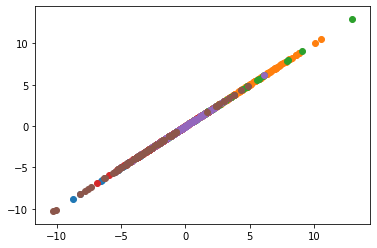

In [5]:
 
#Load Data

pca = PCA(0.95)
 
#Transform the data
scaler = StandardScaler()
matrix = scaler.fit_transform(df)
df = pd.DataFrame(pca.fit_transform(matrix))
 
#Initialize the class object
kmeans = KMeans(n_clusters= 6)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
df['label'] = label
#Getting unique labels
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[df["label"] == i].iloc[:,0],df[df["label"] == i].iloc[:,0])
    

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

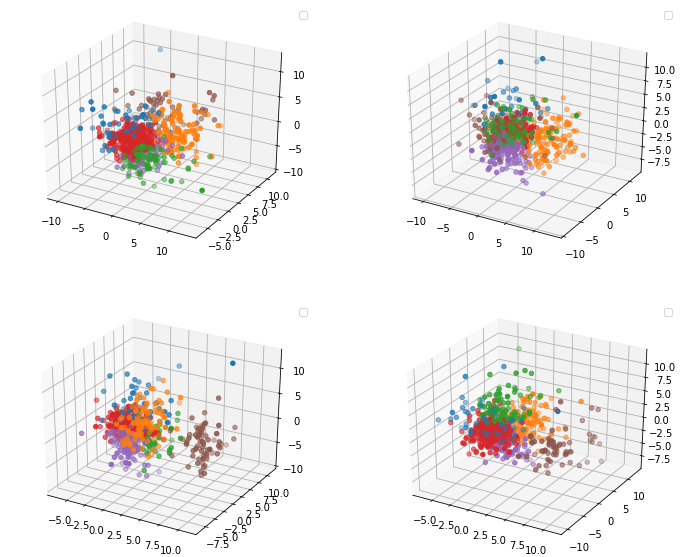

In [6]:
fig,ax= plt.subplots(2,2,subplot_kw = dict(projection='3d'),figsize=(12,10))
 #Axes3D(fig)

#===============
#  First subplot
#===============
# set up the axes for the first plot

#plotting the results:
choices = [(0,1,2),(0,2,3),(1,3,2),(1,0,3)]
#            ( df[label ==i , 3],df[label ==i, 1],df[label ==i , 2]),
#           ( df[label ==i, 0],df[label ==i , 3],df[label ==i , 2]),
#            ( df[label ==i, 0],df[label ==i, 3],df[label ==i, 2])]
index = 0
axescoords =[(0,0),(0,1),(1,0),(1,1)]
labelnames = ['t','v','w','x','y','z']
for a,b,c in choices:
    for i in u_labels:
        ax[axescoords[index]].scatter( df[df['label'] ==i].iloc[:,a]
            ,df[df['label'] ==i].iloc[:,b]
            ,df[df['label'] ==i].iloc[:,c])
        ax[axescoords[index]].legend()
    index += 1

plt.show()            

In [7]:
coef_names = ['Pos', 'G', 'GS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PTS', 'ORtg', 'DRtg', 'Dist.', '2P', '0-3', '3-10', '10-16',
       '16-3P', '3P', '2P.1', '0-3.1', '3-10.1', '10-16.1', '16-3P.1', '3P.1',
       '2P.2', '3P.2', '%FGA', '#', '%3PA', '3P%', 'Att.', '#.1', 'Dist.',
       '2P', '0-3', '3-10', '10-16', '16-3P', '3P', '2P.1', '0-3.1', '3-10.1',
       '10-16.1', '16-3P.1', '3P.1', '2P.2', '3P.2', '%FGA', '#', '%3PA',
       '3P%', 'Att.', '#.1', 'OnCourt', 'On-Off', 'BadPass', 'LostBall',
       'Shoot', 'Off.', 'Shoot.1', 'Off..1', 'PGA', 'And1', 'Blkd', 'FG', '2P',
       '3P', 'eFG', 'FT', 'TS', 'FTr', '3PAr', 'FG+', '2P+', '3P+', 'eFG+',
       'FT+', 'TS+', 'FTr+', '3PAr+', 'FG Add', 'TS Add']

for i in kmeans.cluster_centers_:
    results = scaler.inverse_transform(pca.inverse_transform(i))
    print('\n------------------')
    print(i)
    print('\n------------------')
    for j in list(zip(coef_names,results)):
        print(j)
    print('---------------\n')


------------------
[-3.16982543e+00 -1.45521538e+00  3.60886092e+00  2.87857405e+00
 -7.98600026e-01  3.46046491e+00  1.49629305e-01 -6.52066224e-01
  7.83275965e-01  6.19796770e-02 -3.20554293e-01 -3.81962507e-01
 -2.70355553e-01 -2.01067031e-01  3.32844863e-01  8.77920643e-02
 -6.41087526e-02 -2.78335390e-01  6.47824735e-02 -7.75271392e-02
  2.72181889e-01 -9.14084916e-03 -8.01262692e-03 -5.48492730e-02
  2.75025942e-03  1.12037183e-01 -2.97343711e-01  2.40296785e-01
 -8.69855635e-02  1.52886360e-01 -1.51230298e-01 -1.81695320e-01
 -1.48108165e-02 -4.73321296e-02 -1.67576539e-01  3.41636686e-03
 -1.87419132e-01 -2.36184377e-03  1.63202414e-01 -4.31255885e-03
 -1.21700379e-01 -1.52334655e-01 -2.25980044e-02  1.45649072e-01
 -9.53981360e-03  1.63451935e-01 -4.79618697e-02]

------------------
('Pos', 2.4426183869934417)
('G', 7.404808813794986)
('GS', -0.49758579051195184)
('FG', 2.8975635846724277)
('FGA', 13.312528981104684)
('FG%', 0.20893510716879893)
('3P', 1.199418915099253)
('3

In [8]:

results=scaler.inverse_transform(pca.inverse_transform([[-10.20543811, -3.38459854,  0.69318961]])[0])
list(zip(coef_names,results))

ValueError: shapes (1,3) and (47,96) not aligned: 3 (dim 1) != 47 (dim 0)

In [ ]:
list(zip(playernames,df))

In [ ]:
pcavec1 = list(pca.components_[0])
pcavec2 = list(pca.components_[1])
pcavec3 = list(pca.components_[2])
list(zip(coef_names,pcavec1))

In [ ]:
list(zip(coef_names,pcavec2))

In [ ]:
list(zip(coef_names,pcavec3))

In [ ]:
df2['predicted'] = label

In [ ]:
df2

In [ ]:
len(list(set(playernames)))

In [ ]:
len(df)

In [ ]:
x,y,z = 0,0,0
for i in label:
    
    if i == 2:
        x+=1
    if i == 1:
        y+=1
    if i == 0:
        z+=1
print(f'2{x} 1{y} 0{z}')

In [ ]:
df.iloc[:,0]

In [ ]:
df[(df['0'])&(df["label"] == i)]